
## Buenos Aires Public Bicycle System Analysis: Data Preparation for Power BI

This project documents the **Extract, Transform, and Load (ETL)** process for a public dataset detailing bicycle trips within Buenos Aires' public bike-sharing system.

The primary goal is to **clean and structure** this raw data for subsequent visualization in an **interactive Power BI dashboard**. Through this process, we aim not only to understand the dataset's composition but also to perform a **brief initial exploratory analysis** to reveal key patterns and trends.



In [35]:
%pip install pandas holidays
import holidays
import pandas as pd
import os

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
# Loading the dataset
file_path = os.path.join('data', 'badata_ecobici_recorridos_realizados_2024.csv')

# Load the DataFrame using the relative path
df = pd.read_csv(file_path, sep=',', encoding='utf-8')


In [37]:
# Exploring the dataset
df.head()

,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,genero
0,20428222,568,2024-01-23 18:36:00,513,308 - SAN MARTIN II,Av. San Martín 5129,-58.490739,-34.597130,2024-01-23 18:45:28,498,055 - HABANA,Gral. José Gervasio Artigas 4298 (y Habana),-58.494959,-34.586598,992557.0,FIT,MALE
1,20431744,1355,2024-01-23 22:41:20,460,133 - BEIRO Y SEGUROLA,Segurola 3194,-58.511930,-34.607500,2024-01-23 23:03:55,382,204 - Biarritz,Biarritz 2403,-58.477255,-34.605431,320782.0,FIT,FEMALE
2,20429936,0,2024-01-23 20:06:22,467,328 - SARMIENTO II,Sarmiento 2037,-58.395893,-34.605514,2024-01-23 20:06:22,6,006 - Parque Lezama,"Avenida Martin Garcia, 295",-58.369758,-34.628526,828678.0,FIT,FEMALE
3,20429976,0,2024-01-23 20:08:17,382,204 - Biarritz,Biarritz 2403,-58.477255,-34.605431,2024-01-23 20:08:17,460,133 - BEIRO Y SEGUROLA,Segurola 3194,-58.511930,-34.607500,320782.0,ICONIC,FEMALE
4,20424802,680,2024-01-23 15:18:39,137,137 - AZOPARDO Y CHILE,AZOPARDO 700,-58.367492,-34.615598,2024-01-23 15:29:59,150,150 - RODRIGO BUENO,Av. España 2200,-58.355465,-34.618755,861425.0,FIT,FEMALE


In [38]:
df.shape

(3559284, 17)

In [39]:
df.dtypes

id_recorrido                    int64
duracion_recorrido              int64
fecha_origen_recorrido         object
id_estacion_origen              int64
nombre_estacion_origen         object
direccion_estacion_origen      object
long_estacion_origen          float64
lat_estacion_origen           float64
fecha_destino_recorrido        object
id_estacion_destino             int64
nombre_estacion_destino        object
direccion_estacion_destino     object
long_estacion_destino         float64
lat_estacion_destino          float64
id_usuario                    float64
modelo_bicicleta               object
genero                         object
dtype: object

In [40]:
df.head(10)

,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,genero
0,20428222,568,2024-01-23 18:36:00,513,308 - SAN MARTIN II,Av. San Martín 5129,-58.490739,-34.597130,2024-01-23 18:45:28,498,055 - HABANA,Gral. José Gervasio Artigas 4298 (y Habana),-58.494959,-34.586598,992557.0,FIT,MALE
1,20431744,1355,2024-01-23 22:41:20,460,133 - BEIRO Y SEGUROLA,Segurola 3194,-58.511930,-34.607500,2024-01-23 23:03:55,382,204 - Biarritz,Biarritz 2403,-58.477255,-34.605431,320782.0,FIT,FEMALE
2,20429936,0,2024-01-23 20:06:22,467,328 - SARMIENTO II,Sarmiento 2037,-58.395893,-34.605514,2024-01-23 20:06:22,6,006 - Parque Lezama,"Avenida Martin Garcia, 295",-58.369758,-34.628526,828678.0,FIT,FEMALE
3,20429976,0,2024-01-23 20:08:17,382,204 - Biarritz,Biarritz 2403,-58.477255,-34.605431,2024-01-23 20:08:17,460,133 - BEIRO Y SEGUROLA,Segurola 3194,-58.511930,-34.607500,320782.0,ICONIC,FEMALE
4,20424802,680,2024-01-23 15:18:39,137,137 - AZOPARDO Y CHILE,AZOPARDO 700,-58.367492,-34.615598,2024-01-23 15:29:59,150,150 - RODRIGO BUENO,Av. España 2200,-58.355465,-34.618755,861425.0,FIT,FEMALE
5,20427241,466,2024-01-23 17:48:05,99,099 - Malabia,780 Malabia & Loyola,-58.435408,-34.596096,2024-01-23 17:55:51,206,159 - Fitz Roy & Gorriti,Fitz Roy & Gorriti,-58.437339,-34.584950,320714.0,FIT,OTHER
6,20431004,1176,2024-01-23 21:17:38,68,105 - PARQUE SAAVEDRA,García del Río 3590,-58.480464,-34.552148,2024-01-23 21:37:14,68,105 - PARQUE SAAVEDRA,García del Río 3590,-58.480464,-34.552148,1041602.0,ICONIC,MALE
7,20431427,1906,2024-01-23 22:03:46,17,017 - Plaza Almagro,"441 Bulnes & Peron, Juan Domingo, Tte. General",-58.418731,-34.606410,2024-01-23 22:35:32,186,186 - MANZANA 66,2875 Moreno,-58.406441,-34.613636,992479.0,FIT,FEMALE
8,20429542,695,2024-01-23 19:44:05,284,229 - RIGLOS,1019 Riglos,-58.435056,-34.631018,2024-01-23 19:55:40,432,187 - Jose Maria Moreno,141 Jose Maria Moreno,-58.435801,-34.619879,320688.0,FIT,FEMALE
9,20431142,492,2024-01-23 21:31:25,432,187 - Jose Maria Moreno,141 Jose Maria Moreno,-58.435801,-34.619879,2024-01-23 21:39:37,284,229 - RIGLOS,1019 Riglos,-58.435056,-34.631018,320688.0,FIT,FEMALE


In [41]:
missing_values = df.isnull().sum()
print("Missing Values by Column:")
print(missing_values[missing_values > 0])

Missing Values by Column:
fecha_destino_recorrido     3379
genero                     11946
dtype: int64


In [42]:
# Asigning  "Not Declared" value to missing values in 'genero' column and checking the result
df['genero'] = df['genero'].fillna("Not Declared")
missing_values = df.isnull().sum()
print("Missing Values by Column:")
print(missing_values[missing_values > 0])

Missing Values by Column:
fecha_destino_recorrido    3379
dtype: int64


In [43]:
# Calculating mean duration of trips
duration = df['duracion_recorrido'].mean()
duration_minutes = round(duration / 60,2)
print(f"Average duration of trips: {duration:.2f} seconds or {duration_minutes} minutes")

Average duration of trips: 1274.83 seconds or 21.25 minutes


In [44]:
# Filtering out trips with zero duration (to ensure that we only keep trips that have a valid duration)
invalid_trips = df['duracion_recorrido'] == 0
print(f"Trips with zero duration: {invalid_trips.sum()}")
df = df[df['duracion_recorrido'] > 0]
print(len(df), "trips with valid duration")



Trips with zero duration: 37618
3521666 trips with valid duration


In [45]:
# Exploring gender distribution
print(df['genero'].value_counts())
print(df['genero'].value_counts(normalize=True) * 100)


MALE            2125819
FEMALE          1121191
OTHER            262831
Not Declared      11825
Name: genero, dtype: int64
MALE            60.364015
FEMALE          31.836949
OTHER            7.463257
Not Declared     0.335779
Name: genero, dtype: float64


In [46]:
# Explorign diferences in trip duration by gender
print(df.groupby('genero')['duracion_recorrido'].mean())


genero
FEMALE          1393.320852
MALE            1230.323298
Not Declared    1058.475603
OTHER           1321.497848
Name: duracion_recorrido, dtype: float64


In [47]:
# Calculating the number of unique users 
n_users = df['id_usuario'].nunique()
print(f"Number of unique users: {n_users}")


Number of unique users: 261432


In [48]:
#Calculating the number of trips per user 
#Groups the DataFrame by 'id_usuario' to count the number of trips (rows) for each unique user.

n_trips_by_user = df.groupby('id_usuario').size().reset_index(name='n_trips')

print(n_trips_by_user.head())
print(n_trips_by_user['n_trips'].describe())
print(n_trips_by_user.sort_values(by='n_trips', ascending=False).head(10))


   id_usuario  n_trips
0        24.0        1
1        38.0       44
2        42.0       11
3        48.0        3
4        59.0        1
count    261432.000000
mean         13.470677
std          37.222423
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max        8370.000000
Name: n_trips, dtype: float64
       id_usuario  n_trips
72023    844251.0     8370
6929      55590.0     1401
1754      11188.0     1291
11020     96905.0     1275
46275    668737.0     1257
11006     96713.0     1187
5426      41176.0     1182
594        3820.0     1040
1954      12434.0      997
9412      79281.0      985


In [49]:
one_time_users = n_trips_by_user[n_trips_by_user['n_trips'] == 1].shape[0]
perc_one_time = (one_time_users / n_users) * 100
print(f"Number of one-time users: {one_time_users}")
print(f"Percentage of one-time users: {perc_one_time:.2f}%")

Number of one-time users: 69099
Percentage of one-time users: 26.43%


In [50]:
# Dividing the 'fecha_origen_recorrido' into date and time components
df['fecha_origen_recorrido'] = pd.to_datetime(df['fecha_origen_recorrido'], errors='coerce')
df['fecha_origen'] = df['fecha_origen_recorrido'].dt.date
df['hora_origen'] = df['fecha_origen_recorrido'].dt.time
print(df[['fecha_origen', 'hora_origen']].head())

  fecha_origen hora_origen
0   2024-01-23    18:36:00
1   2024-01-23    22:41:20
4   2024-01-23    15:18:39
5   2024-01-23    17:48:05
6   2024-01-23    21:17:38


<AxesSubplot:title={'center':'Number of trips by Day'}, xlabel='Day', ylabel='Number of trips'>

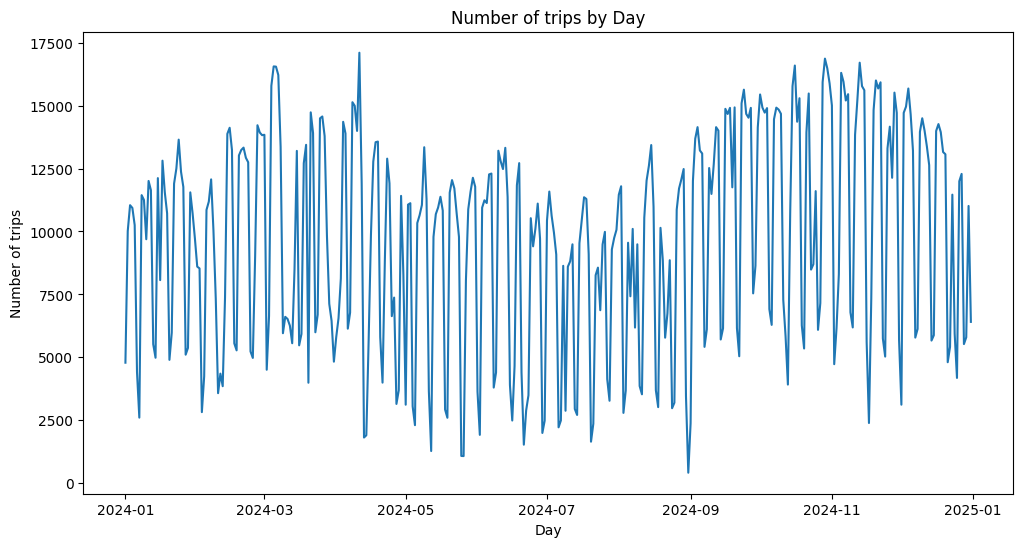

In [51]:
# Plotting the number of trips by hour
trips_per_day = df['fecha_origen'].value_counts().sort_index()
trips_per_day.plot(kind='line', figsize=(12, 6), title='Number of trips by Day', xlabel='Day', ylabel='Number of trips')

<AxesSubplot:title={'center':'Number of trips by Hour'}, xlabel='Hour', ylabel='Number of trips'>

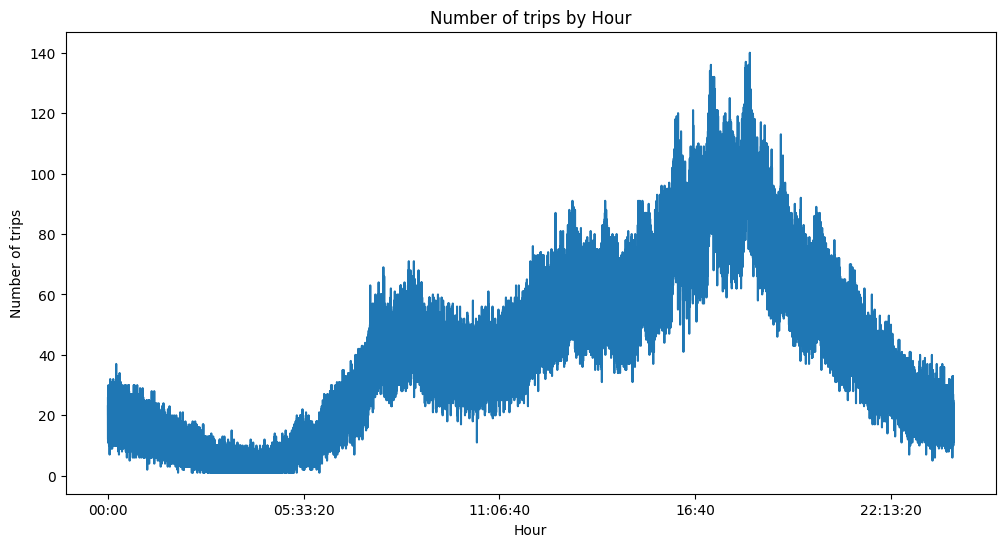

In [52]:
#Plotting the number of trips by hour
trips_per_hour = df['hora_origen'].value_counts().sort_index()
trips_per_hour.plot(kind='line', figsize=(12, 6), title='Number of trips by Hour', xlabel='Hour', ylabel='Number of trips')

In [53]:
# Finding the most frequent trips
frequent_trips = df.groupby(['nombre_estacion_origen', 'nombre_estacion_destino']).size().reset_index(name='frecuencia')
print(frequent_trips.sort_values(by='frecuencia', ascending=False).head(10))

                nombre_estacion_origen          nombre_estacion_destino  \
84723           368 - PLAZA DE LA SHOÁ           368 - PLAZA DE LA SHOÁ   
71458  294 - PLAZOLETA RÍO DE LA PLATA  294 - PLAZOLETA RÍO DE LA PLATA   
38456            152 - JULIETA LANTERI            152 - JULIETA LANTERI   
1074                005 - Plaza Italia               005 - Plaza Italia   
3523                    014 - Pacifico                   014 - Pacifico   
27           001 - FACULTAD DE DERECHO        001 - FACULTAD DE DERECHO   
53697        219 - Parque Chacabuco II        219 - Parque Chacabuco II   
7607           029 - Parque Centenario          029 - Parque Centenario   
62032      255 - BARRANCAS DE BELGRANO      255 - BARRANCAS DE BELGRANO   
84428           368 - PLAZA DE LA SHOÁ                   014 - Pacifico   

       frecuencia  
84723        8076  
71458        7754  
38456        7281  
1074         6611  
3523         5118  
27           4845  
53697        4831  
7607         4

In [54]:
# explorign trips with the same origin and destination

df['same_origin_dest'] = (df['nombre_estacion_origen'] == df['nombre_estacion_destino'])
count_same_od = df['same_origin_dest'].sum()
total_trips = len(df)
percentage_same_od = (count_same_od / total_trips) * 100

print(f"Number of trips with the same origin and destination station (round trips): {count_same_od}")
print(f"Percentage of trips with the same origin and destination station (round trips): {percentage_same_od:.2f}%")

if percentage_same_od > 0:
   same_od_trips = df[df['same_origin_dest']]
   print(same_od_trips.head())
   print(f"\nAverage Duration: {same_od_trips['duracion_recorrido'].mean():.2f} seconds")
   print(f"Maximun Duration: {same_od_trips['duracion_recorrido'].max():.2f} seconds")
   print(f"Minimun Duration: {same_od_trips['duracion_recorrido'].min():.2f} seconds")
   print("\nDescriptives:")
   print(same_od_trips['duracion_recorrido'].describe())
   print("\nTop 5 stations for round trips")
   print(same_od_trips['nombre_estacion_origen'].value_counts().head(5))


Number of trips with the same origin and destination station (round trips): 473116
Percentage of trips with the same origin and destination station (round trips): 13.43%
    id_recorrido  duracion_recorrido fecha_origen_recorrido  \
6       20431004                1176    2024-01-23 21:17:38   
17      20430002                   2    2024-01-23 20:09:36   
18      20432304                2010    2024-01-24 00:11:41   
48      20421060                3880    2024-01-23 09:36:17   
71      20424130                2079    2024-01-23 14:26:49   

    id_estacion_origen nombre_estacion_origen  \
6                   68  105 - PARQUE SAAVEDRA   
17                 184    184 - Pedro Echague   
18                 179         179 - CASA SAN   
48                 418    345 - Plaza Mafalda   
71                 508          170 - RAFAELA   

                    direccion_estacion_origen  long_estacion_origen  \
6                         García del Río 3590            -58.480464   
17  Pedro Echa

In [55]:
# As we are interested in see pattern of trip during the week, we will create a variable that indicates if the trip was made on a weekend or holiday.

df['fecha_origen_dt'] = pd.to_datetime(df['fecha_origen'], errors='coerce')

# Identifing weekends: Saturday (5) and Sunday (6)
is_weekend = (df['fecha_origen_dt'].dt.dayofweek == 5) | (df['fecha_origen_dt'].dt.dayofweek == 6)

# Identifing holidays in Argentina using the holidays library
holiday_argentina = holidays.Argentina(years=df['fecha_origen_dt'].dt.year.unique().tolist())
is_holiday = df['fecha_origen_dt'].dt.date.isin(holiday_argentina)

# Creating variable "is_weekend": 1 saturday, sunday or holiday, 0 otherwise
df['is_weekend'] = (is_weekend | is_holiday).astype(int)

In [56]:
# Display the counts of trips made on weekends or holidays
print(df['is_weekend'].value_counts())

0    2978268
1     543398
Name: is_weekend, dtype: int64


In [57]:
# We want to improve the readability of station names for the dashboard, so we build a custom function to clean the station names.
# This function handles two main tasks:
# 1. Removing the initial numerical code from the station names.
# 2. Applying a specific Spanish title case format:
#    - The first letter of each word is capitalized.
#    - Short articles and prepositions (like "de", "la", "el") remain lowercase, 
#   unless they are the very first word of the name.
# Standard methods like `str.title()` or `str.capitalize()` don't offer this granular control.
def clean_name(name):
    minor_words = {
        "de", "del", "y", "el", "la", "los", "las"
    }

    name_str = str(name) 

    if '-' in name_str:
        text = name_str.split('-', 1)[1].strip()
    else:
        text = name_str.strip()
    
    text_lower = text.lower()
    
    words = text_lower.split()
    
    final_words = []
    for i, word in enumerate(words):
        if i == 0:
            final_words.append(word.capitalize())
        elif word in minor_words:
            final_words.append(word)
        else:
            final_words.append(word.capitalize())
            
    return " ".join(final_words)

df['nombre_estacion_origen_clean'] = df['nombre_estacion_origen'].apply(clean_name)
df['nombre_estacion_destino_clean'] = df['nombre_estacion_destino'].apply(clean_name)

In [58]:
print(df['nombre_estacion_origen_clean'].value_counts().head(10))
print(df['nombre_estacion_destino_clean'].value_counts().head(10))


Constitución             37892
Pacifico                 37119
Plaza de la Shoá         36687
Plaza Italia             34121
Facultad de Derecho      30570
Congreso                 30090
Retiro Ii                29056
Julieta Lanteri          27893
Barrancas de Belgrano    27349
Hospital de Clínicas     26742
Name: nombre_estacion_origen_clean, dtype: int64
Constitución             37944
Pacifico                 36887
Plaza de la Shoá         36737
Plaza Italia             34325
Facultad de Derecho      30616
Congreso                 30314
Retiro Ii                28940
Julieta Lanteri          28804
Barrancas de Belgrano    27622
Carlos Gardel            26889
Name: nombre_estacion_destino_clean, dtype: int64


In [59]:
df.shape

(3521666, 24)

In [ ]:
# Finding the most frequent trips
frequent_trips = df.groupby(['nombre_estacion_origen_clean', 'nombre_estacion_destino_clean']).size().reset_index(name='frecuencia')
print(frequent_trips.sort_values(by='frecuencia', ascending=False).head(10))

      nombre_estacion_origen_clean nombre_estacion_destino_clean  frecuencia
73402             Plaza de la Shoá              Plaza de la Shoá        8076
75222    Plazoleta Río de la Plata     Plazoleta Río de la Plata        7754
41189              Julieta Lanteri               Julieta Lanteri        7281
66298                 Plaza Italia                  Plaza Italia        6611
51698                     Pacifico                      Pacifico        5118
25735          Facultad de Derecho           Facultad de Derecho        4845
53249          Parque Chacabuco Ii           Parque Chacabuco Ii        4831
52958            Parque Centenario             Parque Centenario        4292
9855         Barrancas de Belgrano         Barrancas de Belgrano        4234
73325             Plaza de la Shoá                      Pacifico        4033


In [ ]:
# Saving the cleaned DataFrame to a new CSV file
output_file_path = os.path.join('data', 'recorridos_2024.csv')
df.to_csv(output_file_path, sep=',', encoding='utf-8', index=False)